FEATURE EXTRACTIONS AND ENGINEERING


Lesson Goals

1. What feature extraction is.
2. Why you need to select features
3. How to select features 

From the Machine Learning perspective, a dataset represents a set of observations.Every 
observation in the dataset is represented by a row. Each row contatins a number of columns and features. For example in an application for financia credit assigment, every consumer applying for a loan is an oservation in our dataset, and each observation is described by features such as age, marital status, amount of dependent persons, employment status, etc. We would then generate a classification algorithm that would return a decision on whether we should approve a loan for each customer. 

FEATURE SELECTION 

In Machine Learning feature engineering is the tassk of decifding how to represent an
observation.There maybe alot of variales but not all necessarily useful.For instance in
our example credit application, the favorite refrigarator color of the consumer would not be 
relevand, and thus we would not include it in our features.

In [1]:
import numpy as np
import pandas as pd

In [3]:
census = pd.read_csv(r'./census.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7



DATA TYPES:



DISCRETE VARIABLES 

a discrete variable is a variable that only takes integer values. this type is usefull to 
describe age, years etc



CONTINUOUS VARIABLES 

A continuous variable can take on any number within its definite range. examples could be 
exact weight measurments of an object or a excact distance between two points 



CATEGORICAL VARIABLES 


A categorical variables is a variable that can have a finite number of values within its definited range. Typically a categorical variable will have two or more values. the values maybe not be ordinal. An example of a ordinal categorical variable could describe the risk level of customers of an isurance company( for example high medium, low). and example of a non ordinal variable can be the bloodtype or eye color. 
Either of this variables do not have an inherent ordering to them.



In [5]:
census.dtypes

#TOTAL POP WOULD BE A DISCRETE VARIABLE
# PRIVATE WORK AND PUBLIC WORK A CONTINUES
# STATE AND COUNTRY CATEGORICAL 

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

TRANSFORMING A VARIABLE AND CHANGING ITS TYPE 


there could be cases when we may opt to transform a variable to change its type. 
Typically we take a discrete or continuos variable and transform it into a categorical one by dividing the range into bins. For example we might take a variable describing income and divide it into 3 bins, low income, medium income, high inconme. 
Doing this comes with a cost of information loss. We simplify the variable but we have now lost information about each persons income. 




In the census dataset, we can convert the Income variable from continues to categorical.
Pandas offer to functions to perform this task called cut and qcut. 


<AxesSubplot:>

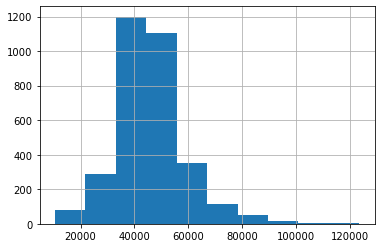

In [6]:
census['Income'].hist()

In [8]:
census['IncomeRange'] = pd.cut(census['Income'],3)
census.IncomeRange.value_counts()

(10386.046, 48150.333]    1984
(48150.333, 85801.667]    1194
(85801.667, 123453.0]       41
Name: IncomeRange, dtype: int64

In [10]:
#We can also opt to create bins based on the distribution. In this case, we will look at the min, 33rd percentile, 66th percentile and the max. 
#We can pass these percentiles to the qcut function 


census['IncomePercentile'] = pd.qcut(census['Income'], [0, 0.333, 0.666, 1])
census['IncomePercentile'].value_counts()

(49730.376, 123453.0]     1075
(40627.158, 49730.376]    1072
(10498.999, 40627.158]    1072
Name: IncomePercentile, dtype: int64

VARIABLE SELECTION

We have mentioned in previous lessons that machine learning seek to balance predictive power and information loss. 
Creating more complex models can be computationally expensive. therefore, it is our goal
to create a simple model while sacrificing as little information as posible.

CORRELATED FEATURES 

A simple and important wy to reduue variables is by removing correlate features.
In performig feature selection, we want to avoid gihgly correlated featurs and dependent features.
Ther reason is that adding one new highly correlated feature or dependant feature to the instance of
representations does not provide new information the Machine Learning can levergae

In our example i we alredy have a yearly income it may be redundant to include a fied monthly
income feature.

In [12]:
census.corr()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusId,1.000000,-0.061914,-0.062449,-0.061385,0.343997,-0.164413,-0.157016,-0.021833,-0.108175,-0.051264,...,-0.050027,-0.128530,-0.027024,0.088303,-0.059778,-0.087347,0.081591,0.041458,-0.015780,0.034926
TotalPop,-0.061914,1.000000,0.999877,0.999886,0.113882,-0.187370,0.075296,-0.046038,0.447874,0.027104,...,-0.047901,0.036125,-0.027852,0.148545,0.997621,0.196913,-0.143553,-0.146419,-0.085016,0.030306
Men,-0.062449,0.999877,1.000000,0.999527,0.114286,-0.186478,0.072807,-0.045818,0.449085,0.028143,...,-0.048278,0.036560,-0.027384,0.147537,0.997481,0.196025,-0.142667,-0.146133,-0.084826,0.029516
Women,-0.061385,0.999886,0.999527,1.000000,0.113466,-0.188187,0.077676,-0.046240,0.446604,0.026096,...,-0.047526,0.035697,-0.028297,0.149481,0.997524,0.197722,-0.144373,-0.146661,-0.085180,0.031060
Hispanic,0.343997,0.113882,0.114286,0.113466,1.000000,-0.724959,-0.144540,-0.056119,0.044244,-0.002645,...,0.000392,0.041738,-0.120975,0.035312,0.102515,-0.170047,0.212196,-0.005562,-0.047897,0.321975
White,-0.164413,-0.187370,-0.186478,-0.188187,-0.724959,1.000000,-0.466185,-0.231565,-0.199347,-0.075080,...,-0.048004,-0.173506,0.217985,-0.077046,-0.176872,0.228257,-0.405057,0.202066,0.112044,-0.538941
Black,-0.157016,0.075296,0.072807,0.077676,-0.144540,-0.466185,1.000000,-0.097140,0.019916,-0.035385,...,-0.169504,-0.004333,-0.281791,0.186750,0.071231,0.064072,0.115743,-0.305339,-0.137477,0.352578
Native,-0.021833,-0.046038,-0.045818,-0.046240,-0.056119,-0.231565,-0.097140,1.000000,-0.002663,0.033927,...,0.362889,0.347975,0.167324,-0.207657,-0.047252,-0.402015,0.452651,0.045619,0.077294,0.188074
Asian,-0.108175,0.447874,0.449085,0.446604,0.044244,-0.199347,0.019916,-0.002663,1.000000,0.353935,...,0.187220,0.133118,0.013706,0.043008,0.463088,0.108109,-0.030053,-0.156825,-0.087749,-0.059663
Pacific,-0.051264,0.027104,0.028143,0.026096,-0.002645,-0.075080,-0.035385,0.033927,0.353935,1.000000,...,0.209134,0.160300,0.020612,-0.066947,0.026891,-0.118206,0.140242,0.004529,-0.004515,-0.037973


In [15]:
census.drop(columns = 'Men', inplace = True)

In [16]:
census

,CensusId,State,County,TotalPop,Women,Hispanic,White,Black,Native,Asian,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,IncomeRange,IncomePercentile
0,1001,Alabama,Autauga,55221,28476,2.6,75.8,18.5,0.4,1.0,...,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,"(48150.333, 85801.667]","(49730.376, 123453.0]"
1,1003,Alabama,Baldwin,195121,99807,4.5,83.1,9.5,0.6,0.7,...,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,"(48150.333, 85801.667]","(49730.376, 123453.0]"
2,1005,Alabama,Barbour,26932,12435,4.6,46.2,46.7,0.2,0.4,...,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,"(10386.046, 48150.333]","(10498.999, 40627.158]"
3,1007,Alabama,Bibb,22604,10531,2.2,74.5,21.4,0.4,0.1,...,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,"(10386.046, 48150.333]","(10498.999, 40627.158]"
4,1009,Alabama,Blount,57710,29198,8.6,87.9,1.5,0.3,0.1,...,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,"(10386.046, 48150.333]","(40627.158, 49730.376]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,29479,96.4,3.4,0.1,0.0,0.0,...,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2,"(10386.046, 48150.333]","(10498.999, 40627.158]"
3216,72147,Puerto Rico,Vieques,9130,4545,96.7,2.9,0.0,0.0,0.0,...,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2,"(10386.046, 48150.333]","(10498.999, 40627.158]"
3217,72149,Puerto Rico,Villalba,24685,12599,99.7,0.0,0.0,0.0,0.0,...,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9,"(10386.046, 48150.333]","(10498.999, 40627.158]"
3218,72151,Puerto Rico,Yabucoa,36279,18631,99.8,0.2,0.0,0.0,0.1,...,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3,"(10386.046, 48150.333]","(10498.999, 40627.158]"


DERIVED FEATURES 

A derived feature is a new feature that you create by combining two or more preexisting raw features. In our census example we can create a derived feature for detecting counties that have a low meduan household income and unemployment higher than 7%. 



In [20]:
census['HighUnemploymentLowIncome'] = np.where((census.Unemployment > 0.07) & (census.IncomePercentile.cat.codes ==0),1,0)

In [21]:
census.HighUnemploymentLowIncome.value_counts()

0    2149
1    1071
Name: HighUnemploymentLowIncome, dtype: int64

In [23]:
How do we know whether Machine Learning will improve with our new derived feature?

Machine Learning is an experimental sience, so you make the experiment of
adding the new derived feature and compara the resulting quailty mtretic with that of the 
original model.

0       2
1       2
2       0
3       0
4       1
       ..
3215    0
3216    0
3217    0
3218    0
3219    0
Length: 3220, dtype: int8